In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
file_names = {
    "train": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_chatgpt.xlsx",
    "test": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_chatgpt.xlsx",
    "val": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_chatgpt.xlsx",
}

In [ ]:
A_train = pd.read_excel(file_names["train"], index_col="id").sample(frac = 1, random_state=2023).reset_index()
A_val = pd.read_excel(file_names["val"])
A_test = pd.read_excel(file_names["test"])

In [ ]:
A_train

,id,Unnamed: 0,Q_id,Q,A,label_Q,label,label_C1,sample_Q,sample_C,sample_C1,sample,chatgpt,chatgpt_label,chatgpt_question
0,128496,853,7016,Juan tiene 250 autitos de carrera. Su hermano...,juanito se quedo con 210 autitos de carrera yt...,2,0,0,0,1,0,1,"Sí, la",0,¿La respuesta muestra comprensión de la pregun...
1,146920,5573,8903,Manuel compró 5 chicles y pagó en total $ 500....,manuel es ta en lo corecto por que cada uno ba...,3,0,0,0,1,0,1,La respuesta muestra comp,0,¿La respuesta muestra comprensión de la pregun...
2,139255,5938,8391,Camilo tiene que juntar 60 balones. Lleva junt...,esta bien porque y operacion inversa,3,0,0,0,1,0,1,"Sí, la",0,¿La respuesta es lógica y consistente con la p...
3,134357,6704,7404,El lunes José se compra 3 figuritas de Avenge...,nj444,3,1,0,0,1,0,1,"No, la respuesta",1,¿La respuesta brinda una respuesta directa y r...
4,135681,4583,8970,"Lorena recibió un chocolate de regalo, ella co...",no porque lorena no le repartio el chocolate e...,3,0,0,1,0,0,1,"No, la respuesta",1,¿La respuesta muestra los cálculos o procesos ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,132077,6610,7250,Amanda compró 2 chocolates a $135 cada uno y u...,Entotal SERIA 520 POR QUE 135 + 135+250=520,3,1,0,1,0,0,1,La respuesta muestra comp,0,¿La respuesta muestra comprensión de la pregun...
866,146339,11547,8867,Escribe una historia para que el duende Pepo p...,el duende Pepo estaba en un pantano embrujand...,0,1,1,0,0,1,1,"No, la respuesta",1,¿La respuesta demuestra conocimiento y compren...
867,147338,4489,8871,"Para formar una figura de 7/10, Andrea dice qu...",esta incorrecto por que si quiere formar una f...,3,0,0,1,0,0,1,"Sí, la",0,¿La respuesta es clara y utiliza un idioma y o...
868,150359,3660,9099,Sofía tenía 5 000 pesos para gastar en un supe...,aguante el FORTNITE,2,1,0,0,0,1,1,"No, la respuesta",1,¿La respuesta muestra los cálculos o procesos ...


In [ ]:
(A_train.shape[0]+A_val.shape[0])/10

109.0

In [ ]:
A_train.info(), A_val.info(), A_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                870 non-null    int64 
 1   Unnamed: 0        870 non-null    int64 
 2   Q_id              870 non-null    int64 
 3   Q                 870 non-null    object
 4   A                 870 non-null    object
 5   label_Q           870 non-null    int64 
 6   label             870 non-null    int64 
 7   label_C1          870 non-null    int64 
 8   sample_Q          870 non-null    int64 
 9   sample_C          870 non-null    int64 
 10  sample_C1         870 non-null    int64 
 11  sample            870 non-null    int64 
 12  chatgpt           870 non-null    object
 13  chatgpt_label     870 non-null    int64 
 14  chatgpt_question  870 non-null    object
dtypes: int64(11), object(4)
memory usage: 102.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entrie

(None, None, None)

<Axes: >

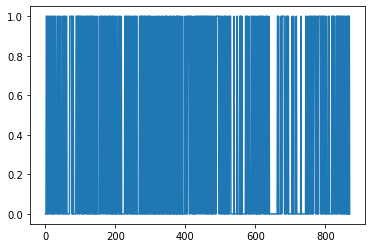

In [ ]:
A_train["chatgpt_label"].plot()

In [ ]:
%%capture
!pip install transformers
!pip install datasets
!pip install torch

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
model_name = "dccuchile/bert-base-spanish-wwm-cased"
beto_model = BertModel.from_pretrained(model_name)
beto_tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case=False)
e = beto_model.eval()

NameError: ignored

In [ ]:
beto_tokenizer.all_special_tokens, beto_tokenizer.all_special_ids

(['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]'], [3, 5, 1, 4, 0])

In [ ]:
from torch.utils.data import Dataset
class DatasetTaskChatGPT(Dataset):
    def __init__(self, df, maxlen):
        self.df = df
        self.tokenizer = beto_tokenizer
        self.maxlen = maxlen

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        sentence1 = str(self.df.loc[index, 'Q'])
        sentence2 = str(self.df.loc[index, 'A'])
        sentence3 = str(self.df.loc[index, 'chatgpt_question'])

        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())

        label = int(self.df.loc[index, "chatgpt_label"])

        tokens1 = self.tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = self.tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]
        tokens3 = self.tokenizer.tokenize(sentence3) if len(sentence3)>0 else ["[UNK]"]

        if len(tokens1) < self.maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(self.maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:self.maxlen]

        if len(tokens2) < self.maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(self.maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:self.maxlen]

        if len(tokens3) < self.maxlen:
            tokens3 = tokens3 + ['[PAD]' for _ in range(self.maxlen - len(tokens3))]
        else:
            tokens3 = tokens3[:self.maxlen]

        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]+tokens3+["[SEP]"]
        tokens_ids = self.tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1

        return tokens_ids_tensor, attn_mask, label

In [ ]:
from torch.utils.data import DataLoader

train_set = DatasetTaskChatGPT(df = A_train, maxlen = 60)
val_set = DatasetTaskChatGPT(df = A_val, maxlen = 60)

train_loader = DataLoader(train_set, batch_size = 16, num_workers = 2, shuffle=False)
val_loader = DataLoader(val_set, batch_size =   16, num_workers = 2, shuffle=False)

test_set = DatasetTaskChatGPT(df = A_test, maxlen = 60)

test_loader = DataLoader(test_set, batch_size = 16, num_workers = 2, shuffle=False)

In [ ]:
import torch.nn as nn
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        torch.manual_seed(2022)

        self.bert_layer = BertModel.from_pretrained(model_name).cuda()
        self.cls_layer = nn.Linear(768, 2).cuda()

    def forward(self, seq, attn_masks):

        cont_reps = self.bert_layer(seq, attention_mask=attn_masks)
        cls_rep = cont_reps.last_hidden_state[:, 0]
        logits = self.cls_layer(cls_rep)

        return logits

In [ ]:
import torch.optim as optim

net = Classifier()

weights = torch.tensor([1, 1.])#torch.tensor([1., 2.188])
criterion = nn.CrossEntropyLoss(weight=weights, reduction='mean').cuda()

opti = optim.Adam(net.parameters(), lr = 8e-5)

Some weights of the model checkpoint at dccuchile/bert-base-spanish-wwm-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bi

In [ ]:
def get_accuracy_from_logits(logits, labels):
    probs = torch.sigmoid(logits)
    soft_probs = probs.argmax(1)
    acc = (soft_probs.squeeze() == labels).float().mean()
    return acc

def evaluate(net, criterion, dataloader):
    net.eval()
    mean_acc, mean_loss = 0, 0
    count = 0
    with torch.no_grad():
        for seq, attn_masks, labels in dataloader:
            seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(seq, attn_masks)
            mean_loss += criterion(logits, labels).item()
            mean_acc += get_accuracy_from_logits(logits, labels)
            count += 1

    return mean_acc / count, mean_loss / count

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

def evaluate_precision_recall_fscore_support(net, dataloader):
    net.eval()
    preds = []
    tests = []
    with torch.no_grad():
        for seq, attn_masks, labels in dataloader:
            seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()
            logits = net(seq, attn_masks)
            probs = torch.sigmoid(logits)
            soft_probs = probs.argmax(1)
            preds += soft_probs.squeeze().tolist()
            tests += labels.tolist()
    return tests, preds

In [ ]:
def train(net, criterion, opti, train_loader, val_loader, test_loader, epochs):
    for ep in range(epochs):
        for it, (seq, attn_masks, labels) in enumerate(train_loader):
            opti.zero_grad()

            seq, attn_masks, labels = seq.cuda(), attn_masks.cuda(), labels.cuda()

            logits = net(seq, attn_masks)

            loss = criterion(logits, labels)

            loss.backward()

            opti.step()

            if (it + 1) % 10 == 0:
                acc = get_accuracy_from_logits(logits, labels)
                # tests, preds = evaluate_precision_recall_fscore_support(net, train_loader)
                # print(classification_report(tests, preds))
                print("Iteration {} of epoch {} complete. Loss : {} Train Accuracy : {}".format(it+1, ep+1, loss.item(), acc))
        val_acc, val_loss = evaluate(net, criterion, val_loader)
        tests, preds = evaluate_precision_recall_fscore_support(net, val_loader)
        print(classification_report(tests, preds))
        print("Epoch {} complete! Validation Accuracy : {}, Validation Loss : {}".format(ep+1, val_acc, val_loss))

        test_acc,  test_loss = evaluate(net, criterion,  test_loader)
        tests, preds = evaluate_precision_recall_fscore_support(net, test_loader)
        print(classification_report(tests, preds))
        print("Epoch {} complete! Test Accuracy : {}, Test Loss : {}".format(ep+1, test_acc, test_loss))

In [ ]:
epochs = 7
train(net, criterion, opti, train_loader, val_loader, test_loader, epochs)

Iteration 10 of epoch 1 complete. Loss : 0.6800748109817505 Train Accuracy : 0.5
Iteration 20 of epoch 1 complete. Loss : 0.5709652900695801 Train Accuracy : 0.75
Iteration 30 of epoch 1 complete. Loss : 0.5008130669593811 Train Accuracy : 0.875
Iteration 40 of epoch 1 complete. Loss : 0.7803674340248108 Train Accuracy : 0.75
Iteration 50 of epoch 1 complete. Loss : 0.4910718500614166 Train Accuracy : 0.875
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       151
           1       0.59      0.83      0.69        69

    accuracy                           0.77       220
   macro avg       0.75      0.78      0.75       220
weighted avg       0.81      0.77      0.78       220

Epoch 1 complete! Validation Accuracy : 0.766369104385376, Validation Loss : 0.521848093186106
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      4485
           1       0.50      0.78      0.61      2285

   

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
!git config --global credential.helper store

In [2]:
repo_name = "beto_ft_binary_chatgpt"
net.bert_layer.push_to_hub(repo_name)

In [3]:
val_set.tokenizer.push_to_hub(repo_name)

In [ ]:
torch.save(net.cls_layer, "cls_layer.torch")

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:

%%capture
!pip install transformers
!pip install datasets
!pip install torch

from transformers import BertTokenizer, BertModel
import torch

In [ ]:
from huggingface_hub import hf_hub_url, cached_download

In [4]:
repo_name = "beto_ft_binary_chatgpt"
config_file_url = hf_hub_url("X/"+repo_name, filename="cls_layer.torch")
value = cached_download(config_file_url)
cls_layer = torch.load(value)

NameError: ignored

In [ ]:
beto_model = BertModel.from_pretrained("X/"+repo_name).cuda()
beto_tokenizer = BertTokenizer.from_pretrained("X/"+repo_name, do_lower_case=False)
e = beto_model.eval()

In [ ]:
 def preproccesing(Q, A, question, maxlen=60):
        sentence1 = str(Q)
        sentence2 = str(A)
        sentence3 = str(question)

        sentence1 = " ".join(str(sentence1).replace("\n", " ").split())
        sentence2 = " ".join(str(sentence2).replace("\n", " ").split())

        tokens1 = beto_tokenizer
        tokens1 = beto_tokenizer.tokenize(sentence1) if len(sentence1)>0 else ["[UNK]"]
        tokens2 = beto_tokenizer.tokenize(sentence2) if len(sentence2)>0 else ["[UNK]"]
        tokens3 = beto_tokenizer.tokenize(sentence3) if len(sentence3)>0 else ["[UNK]"]

        if len(tokens1) < maxlen:
            tokens1 = tokens1 + ['[PAD]' for _ in range(maxlen - len(tokens1))]
        else:
            tokens1 = tokens1[:maxlen]

        if len(tokens2) < maxlen:
            tokens2 = tokens2 + ['[PAD]' for _ in range(maxlen - len(tokens2))]
        else:
            tokens2 = tokens2[:maxlen]

        if len(tokens3) < maxlen:
            tokens3 = tokens3 + ['[PAD]' for _ in range(maxlen - len(tokens3))]
        else:
            tokens3 = tokens3[:maxlen]

        tokens = ["[CLS]"]+tokens1+["[SEP]"]+tokens2+["[SEP]"]+tokens3+["[SEP]"]
        tokens_ids = beto_tokenizer.convert_tokens_to_ids(tokens)
        tokens_ids_tensor = torch.tensor(tokens_ids)
        attn_mask = (tokens_ids_tensor != 1).long() # [PAD] => 1

        return tokens_ids_tensor.cuda(), attn_mask.cuda()

In [ ]:
def ChatGPTClassifier(Q, A, question):
    tokens_ids_tensor, attn_mask = preproccesing(Q, A, question)
    cont_reps = beto_model(tokens_ids_tensor.unsqueeze(0), attention_mask = attn_mask.unsqueeze(0))
    cls_rep = cont_reps.last_hidden_state[:, 0]
    logits = cls_layer(cls_rep)
    probs = torch.sigmoid(logits)
    return probs.detach().cpu().numpy()[0]

In [ ]:
Q = "Julieta tiene 20 láminas y le regaló 12 a Daniela ¿Cuántas láminas tiene ahora Julieta? Explica con tus palabras."
A1 = "son 8 "
question = "¿La respuesta proporciona información relevante y precisa relacionada con la pregunta planteada?"
ChatGPTClassifier(Q, A1, question)

array([0.8589865 , 0.10380306], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
%%time
y_pred = A_train.apply(lambda x: int(np.argmax(ChatGPTClassifier(x["Q"], x["A"], x["chatgpt_question"]))), axis=1)
report = classification_report(A_train["chatgpt_label"], y_pred, output_dict=True)
train_report = pd.DataFrame(report)
train_report

 	0 	1 	accuracy 	macro avg 	weighted avg
precision 	0.954874 	0.968553 	0.959862 	0.961714 	0.960098
recall 	0.981447 	0.924925 	0.959862 	0.953186 	0.959862
f1-score 	0.967978 	0.946237 	0.959862 	0.957107 	0.959675
support 	539.000000 	333.000000 	0.959862 	872.000000 	872.000000

In [ ]:
%%time
y_pred = A_val.apply(lambda x: int(np.argmax(ChatGPTClassifier(x["Q"], x["A"], x["chatgpt_question"]))), axis=1)
report = classification_report(A_val["chatgpt_label"], y_pred, output_dict=True)
val_report = pd.DataFrame(report)
val_report

CPU times: user 4.56 s, sys: 8.13 ms, total: 4.57 s
Wall time: 4.69 s


,0,1,accuracy,macro avg,weighted avg
precision,0.973333,0.928571,0.959091,0.950952,0.959294
recall,0.966887,0.942029,0.959091,0.954458,0.959091
f1-score,0.970100,0.935252,0.959091,0.952676,0.959170
support,151.000000,69.000000,0.959091,220.000000,220.000000


 	0 	1 	accuracy 	macro avg 	weighted avg
precision 	0.942446 	0.898734 	0.926606 	0.92059 	0.926606
recall 	0.942446 	0.898734 	0.926606 	0.92059 	0.926606
f1-score 	0.942446 	0.898734 	0.926606 	0.92059 	0.926606
support 	139.000000 	79.000000 	0.926606 	218.00000 	218.000000

In [ ]:
%%time
y_pred = A_test.apply(lambda x: int(np.argmax(ChatGPTClassifier(x["Q"], x["A"], x["chatgpt_question"]))), axis=1)
report = classification_report(A_test["chatgpt_label"], y_pred, output_dict=True)
test_report = pd.DataFrame(report)
test_report

CPU times: user 1min 51s, sys: 275 ms, total: 1min 51s
Wall time: 1min 52s


,0,1,accuracy,macro avg,weighted avg
precision,0.791111,0.754859,0.78257,0.772985,0.778875
recall,0.912821,0.526915,0.78257,0.719868,0.782570
f1-score,0.847619,0.620619,0.78257,0.734119,0.771002
support,4485.000000,2285.000000,0.78257,6770.000000,6770.000000


 	0 	1 	accuracy 	macro avg 	weighted avg
precision 	0.791111 	0.754859 	0.78257 	0.772985 	0.778875
recall 	0.912821 	0.526915 	0.78257 	0.719868 	0.782570
f1-score 	0.847619 	0.620619 	0.78257 	0.734119 	0.771002
support 	4485.000000 	2285.000000 	0.78257 	6770.000000 	6770.000000

In [ ]:
chatgpt_questions = [
    '¿La respuesta brinda una respuesta directa y relacionada con la pregunta planteada?',
    '¿La respuesta es clara, concisa y utiliza un lenguaje fácil de entender y preciso?',
    '¿La respuesta proporciona información relevante y precisa relacionada con la pregunta planteada?',
    '¿La respuesta es lógica y consistente con la pregunta y las matemáticas básicas?',
    '¿La respuesta proporciona información útil y sin tonos jocosos, sarcásticos o ambigüedades?',
    '¿La respuesta es clara y utiliza un idioma y ortografía adecuados a la pregunta planteada?',
    '¿La respuesta muestra los cálculos o procesos para llegar a un valor numérico?',
    '¿La respuesta demuestra conocimiento y comprensión adecuados del tema planteado en la pregunta?',
    '¿La respuesta muestra comprensión de la pregunta y evidencia algún intento de resolver el problema matemático planteado?',
    '¿La respuesta ofrece argumentos o ejemplos para respaldar su afirmación?'
]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_file_names = {
    "train": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1.xlsx",
    "test": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1.xlsx",
    "val": "/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1.xlsx",
}

In [ ]:
all_A_train = pd.read_excel(all_file_names["train"])
all_A_val = pd.read_excel(all_file_names["val"])
all_A_test = pd.read_excel(all_file_names["test"])

In [ ]:
for i, qq in enumerate(chatgpt_questions):
  print("ChatGPT question:", f"v{i+1}")
  new_A_train = all_A_train.copy()
  y_pred = new_A_train.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_train["chatgpt_label"] = y_pred
  new_A_train.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1_beto_ft_chatgpt_v{i+1}.xlsx")

ChatGPT question: v1
ChatGPT question: v2
ChatGPT question: v3
ChatGPT question: v4
ChatGPT question: v5
ChatGPT question: v6
ChatGPT question: v7
ChatGPT question: v8
ChatGPT question: v9
ChatGPT question: v10


In [ ]:
for i, qq in enumerate(chatgpt_questions):
  print("ChatGPT question:", f"v{i+1}")
  new_A_test = all_A_test.copy()
  y_pred = new_A_test.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_test["chatgpt_label"] = y_pred
  new_A_test.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1_beto_ft_chatgpt_v{i+1}.xlsx")

ChatGPT question: v1
ChatGPT question: v2
ChatGPT question: v3
ChatGPT question: v4
ChatGPT question: v5
ChatGPT question: v6
ChatGPT question: v7
ChatGPT question: v8
ChatGPT question: v9
ChatGPT question: v10


In [ ]:
for i, qq in enumerate(chatgpt_questions):
  print("ChatGPT question:", f"v{i+1}")
  new_A_val = all_A_val.copy()
  y_pred = new_A_val.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_val["chatgpt_label"] = y_pred
  new_A_val.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1_beto_ft_chatgpt_v{i+1}.xlsx")

ChatGPT question: v1
ChatGPT question: v2
ChatGPT question: v3
ChatGPT question: v4
ChatGPT question: v5
ChatGPT question: v6
ChatGPT question: v7
ChatGPT question: v8
ChatGPT question: v9
ChatGPT question: v10


In [ ]:
other_chatgpt_questions = {
    "v5": [
      "¿La respuesta tiene un tono jocoso o inapropiado para la pregunta?",
      "¿La respuesta parece ser una broma o una respuesta humorística?",
      "¿La respuesta se limita a un comentario sarcástico en lugar de proporcionar una respuesta útil y coherente?",
      "¿La respuesta no presenta contradicciones o ambigüedades con la pregunta planteada?",
      "¿La respuesta es breve y poco elaborada?"
    ]
}

In [1]:
vi = "v5"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_train = all_A_train.copy()
  y_pred = new_A_train.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_train["chatgpt_label"] = y_pred
  new_A_train.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

NameError: ignored

In [ ]:
vi = "v5"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_test = all_A_test.copy()
  y_pred = new_A_test.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_test["chatgpt_label"] = y_pred
  new_A_test.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: v5_1
ChatGPT question: v5_2
ChatGPT question: v5_3
ChatGPT question: v5_4
ChatGPT question: v5_5


In [ ]:
vi = "v5"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_val = all_A_val.copy()
  y_pred = new_A_val.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_val["chatgpt_label"] = y_pred
  new_A_val.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: v5_1
ChatGPT question: v5_2
ChatGPT question: v5_3
ChatGPT question: v5_4
ChatGPT question: v5_5


In [ ]:
other_chatgpt_questions["v6"] = [
  "¿La respuesta contiene errores ortográficos o gramaticales?",
  "¿La respuesta utiliza un idioma y ortografía coherentes con la pregunta?",
  "¿Es la respuesta una palabra o frase aleatoria sin relación con la pregunta?",
  "¿La respuesta es coherente con el idioma en el que se hizo la pregunta?"
]

In [ ]:
vi = "v6"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_train = all_A_train.copy()
  y_pred = new_A_train.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_train["chatgpt_label"] = y_pred
  new_A_train.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

In [ ]:
vi = "v6"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_test = all_A_test.copy()
  y_pred = new_A_test.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_test["chatgpt_label"] = y_pred
  new_A_test.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

In [ ]:
vi = "v6"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  print("ChatGPT question:", f"{vi}_{i+1}")
  new_A_val = all_A_val.copy()
  y_pred = new_A_val.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
  new_A_val["chatgpt_label"] = y_pred
  new_A_val.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

In [ ]:
other_chatgpt_questions["Q3"] = [
  "¿La respuesta indica claramente si la afirmación del personaje es correcta o no?",
  "¿La respuesta utiliza ejemplos específicos para respaldar la elección del personaje correcto?",
  "¿La respuesta muestra una comprensión clara de los conceptos matemáticos involucrados en la pregunta?",
  "¿La respuesta indica si el personaje seleccionado tiene más o menos conocimientos matemáticos que otros personajes mencionados en la pregunta?",
  "¿La respuesta demuestra la capacidad del alumno para razonar lógicamente y seguir un proceso de pensamiento coherente?",
  "¿La respuesta hace referencia a otras fuentes de información relevantes que puedan respaldar la elección del personaje correcto?",
  "¿La respuesta considera todas las posibles opciones y proporciona una justificación para descartar las opciones incorrectas?",
  "¿La respuesta refleja una comprensión clara del contexto y las situaciones descritas en la pregunta?",
  "¿La respuesta a la pregunta implica decidir si una afirmación es correcta o incorrecta?",
  "¿Se pide una justificación para la respuesta a la pregunta?",
  "¿La pregunta presenta un personaje que debe tomar una decisión matemática?",
  "¿La respuesta a la pregunta implica verificar si una operación matemática fue realizada correctamente?",
  "¿La respuesta a la pregunta debe proporcionar una explicación clara de por qué es correcta o incorrecta?",
  "¿La pregunta implica que el alumno debe evaluar la lógica y coherencia de la respuesta del personaje de la historia?",
  '¿La respuesta a la pregunta es "sí" o "no"?',
  "¿La respuesta proporciona una justificación para la elección del personaje correcto?"
]

In [ ]:
len(other_chatgpt_questions["Q3"])

16

In [ ]:
vi = "Q3"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i == 15:
    print("ChatGPT question:", f"{vi}_{i+1}")
    new_A_train = all_A_train.copy()
    y_pred = new_A_train.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_train["chatgpt_label"] = y_pred
    new_A_train.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: Q3_16


In [ ]:
vi = "Q3"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i == 15:
    print("ChatGPT question:", f"{vi}_{i+1}")
    new_A_test = all_A_test.copy()
    y_pred = new_A_test.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_test["chatgpt_label"] = y_pred
    new_A_test.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: Q3_16


In [ ]:
vi = "Q3"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i == 15:
    print("ChatGPT question:", f"{vi}_{i+1}")
    new_A_val = all_A_val.copy()
    y_pred = new_A_val.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_val["chatgpt_label"] = y_pred
    new_A_val.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: Q3_16


In [ ]:
other_chatgpt_questions = {
    "Q3_7": [
        "¿La respuesta contempla todas las opciones y descarta las incorrectas?",
        "¿La respuesta proporciona justificación para descartar opciones incorrectas?",
        "¿La respuesta considera todas las opciones posibles?",
        "¿La respuesta descarta opciones incorrectas con justificación?",
        "¿La respuesta contempla todas las opciones y justifica descartes?"
      ],
      "10": [
        "¿La respuesta incluye evidencia o justificación?",
        "¿La respuesta presenta pruebas o razones?",
        "¿La respuesta sustenta su afirmación con datos?",
        "¿La respuesta respalda su posición con hechos?",
        "¿La respuesta defiende su afirmación con argumentos sólidos?"
      ],
      "5": [
        "¿La respuesta es seria y útil?",
        "¿La respuesta es clara y útil?",
        "¿La respuesta evita ambigüedades?",
        "¿La respuesta es informativa y directa?",
        "¿La respuesta es precisa y sin tono jocoso?"
      ],
      "Q3_15":[
        "¿La respuesta es afirmativa?",
        "¿Es la respuesta negativa?",
        "¿La respuesta es sí o no?",
        """¿Se puede responder con "sí" o "no"?""",
        "¿La respuesta es binaria?"
      ],
      "Q3_4": [
        "¿La respuesta indica superioridad matemática del personaje?",
        "¿El personaje seleccionado sabe más matemáticas que otros mencionados?",
        "¿El personaje elegido tiene más habilidades matemáticas que los demás?",
        "¿La respuesta indica si el personaje es más matemático que otros?",
        "¿El personaje seleccionado es el más habilidoso en matemáticas?"
      ],
      "7": [
        "¿La respuesta incluye cálculos o procesos?",
        "¿Se muestran los procesos para obtener el valor?",
        "¿La respuesta proporciona los cálculos realizados?",
        "¿Está presente la metodología de cálculo en la respuesta?",
        "¿La respuesta da a conocer el proceso de cálculo?"
      ],
      "Q3_5": [
        "¿La respuesta indica habilidades lógicas y coherencia?",
        "¿La respuesta muestra razonamiento y cohesión?",
        "¿La respuesta revela habilidades de pensamiento coherente?",
        "¿La respuesta demuestra una mente lógica y coherente?",
        "¿La respuesta refleja la capacidad de razonamiento y cohesión?"
      ]
}

In [ ]:
other_chatgpt_questions = {
    "HF":["¿La respuesta tiene un número razonable de tokens?",
      "¿La respuesta tiene una longitud máxima razonable de caracteres repetidos?",
      "¿La respuesta tiene una proporción razonable de vocales?",
      "¿La respuesta tiene una proporción razonable de caracteres que no son números?",
      "¿La pregunta incluye un nombre propio y en la respuesta?",
      "¿La pregunta sugiere que algo es correcto o que alguien tiene razón?"
    ]
  }

In [ ]:
other_chatgpt_questions = {
    "SP":["¿La respuesta implica el uso de números o cifras?",
          "¿La respuesta contradice la pregunta?",
          "¿La respuesta describe el proceso utilizado para obtener el resultado o llegar a la conclusión?",
          "¿La respuesta contiene alguna de las palabras 'sí' o 'no'?",

          "¿La respuesta es una opinión personal?",
          "¿La respuesta tiene sentido?"

    ]
  }

In [ ]:
vi = "SP"
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i>=4:
    print("ChatGPT question:", f"{vi}_e{i+1}")
    new_A_train = all_A_train.copy()
    y_pred = new_A_train.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_train["chatgpt_label"] = y_pred
    new_A_train.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/train_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: SP_e5
ChatGPT question: SP_e6


In [ ]:
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i>=4:
    print("ChatGPT question:", f"{vi}_e{i+1}")
    new_A_test = all_A_test.copy()
    y_pred = new_A_test.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_test["chatgpt_label"] = y_pred
    new_A_test.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/test_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: SP_e5
ChatGPT question: SP_e6


In [ ]:
for i, qq in enumerate(other_chatgpt_questions[vi]):
  if i>=4:
    print("ChatGPT question:", f"{vi}_e{i+1}")
    new_A_val = all_A_val.copy()
    y_pred = new_A_val.apply(lambda x: ChatGPTClassifier(x["Q"], x["A"], qq), axis=1)
    new_A_val["chatgpt_label"] = y_pred
    new_A_val.to_excel(f"/content/drive/MyDrive/MA5811-1 - Primavera 2021: X/val_task_C1_beto_ft_chatgpt_{vi}_{i+1}.xlsx")

ChatGPT question: SP_e5
ChatGPT question: SP_e6
